# Introduction to Logistic Regression 



## Learning objectives

1. Create Seaborn plots for Exploratory Data Analysis. 
2. Train a Logistic Regression Model using Scikit-Learn.


## Introduction 

This lab is an introduction to logistic regression using Python and Scikit-Learn In this lab, you will use a synthetic advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. You will try to create a model that will predict whether or not they will click on an ad based off the features of that user.  



### Import Libraries

In [1]:
# You can use any Python source file as a module by executing an import statement in some other Python source file.
# The import statement combines two operations; it searches for the named module, then it binds the
# results of that search to a name in the local scope.
import os
import pandas as pd
import numpy as np
# Import matplotlib to visualize the model
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
%matplotlib inline

###  Load the Dataset

You will use a synthetic [advertising](https://www.kaggle.com/fayomi/advertising) dataset.  This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [2]:
#1: Read in the advertising.csv file and set it to a data frame called ad_data.
ad_data = pd.read_csv('../advertising.csv')

**Check the head of ad_data**

In [3]:
# Get the first five rows of DataFrame ad_data.
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [4]:
# Get a concise summary of DataFrame ad_data.
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
# Get the statistical summary of the DataFrame ad_data.
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Let's check for any null values.

In [6]:
# The isnull() method is used to check and manage NULL values in a data frame.
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## Exploratory Data Analysis (EDA)

Let's use seaborn to explore the data!  Try recreating the plots shown below!

Text(0.5, 0, 'Age')

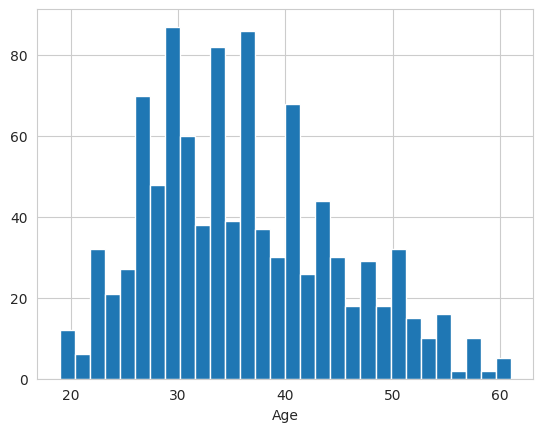

In [16]:
# Seaborn is a Python data visualization library based on matplotlib.
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

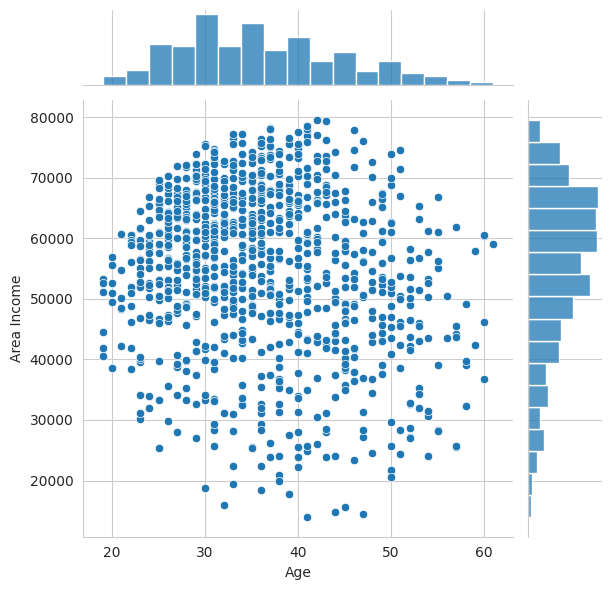

In [17]:
# Seaborn’s jointplot displays a relationship between 2 variables (bivariate) as well as
# 1D profiles (univariate) in the margins.
sns.jointplot(x='Age',y='Area Income',data=ad_data)

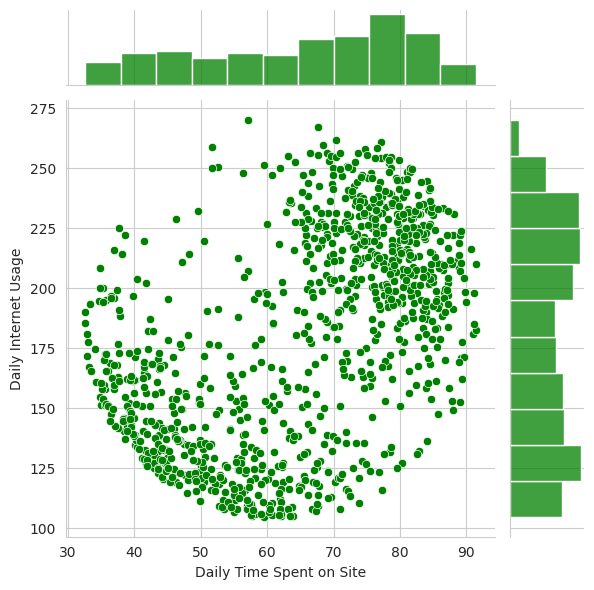

In [10]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

# Logistic Regression
Now it's time to do a train test split, and train our model!  You'll have the freedom here to choose columns that you want to train on!

In [18]:
# `train_test_split` is a function in Sklearn model selection for splitting data arrays into two subsets:
# for training data and for testing data.
# With this function, you don't need to divide the dataset manually.
# By default, Sklearn `train_test_split` will make random partitions for the two subsets.
# However, you can also specify a random state for the operation.
from sklearn.model_selection import train_test_split

Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [19]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Train and fit a logistic regression model on the training set.**

In [21]:
# Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification.
# It is easy to implement and can be used as the baseline for any binary classification problem.
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [23]:
# Use predict() function to predict values for the testing data.
predictions = logmodel.predict(X_test)

**Create a classification report for the model.**

In [24]:
# The classification_report function builds a text report showing the main classification metrics.
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

